# Optimisation de réseaux de neurones profonds
Dans ce TP, on a une fonction $f:\mathbb R^2 \rightarrow \mathbb R$ qui n'est connue que sur un certain nombre de points $n$ (ici $n=200*200$). L'objectif est d'approximer cette fonction $f$ en dehors des points qui sont connus par un réseau de neurones profond du type MLP.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Présentation des données
Ici $f$ est une fonction de $[-1,1]\times [-1,1]$ dans $\mathbb{R}$ donnée par 
$x\mapsto \sin(6\pi |x|^{3/2})*|\sin(\pi*|y|) +x^2+y^2$. Elle est échantillonnée sur $nx=200$ points en $x$ et en $ny=y$. On connaît donc $n=nx*ny$ valeurs de la fonction. Les données d'entrées sont notées `inp` et est un tableau de taille $(2,n)$ et les données de sortie sont les valeurs de $f$, elles sont notées `outp` et est un tableau de taille $n$.

/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_57439/3147635795.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


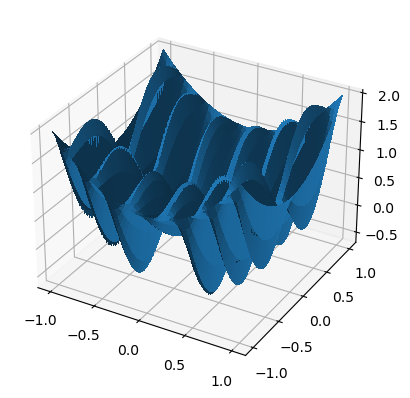

In [2]:
nx = 100
ny= 100
n=nx*ny
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
x, y = np.meshgrid(x, y)
z = np.sin(6*np.pi*np.abs(x)**1.5)*np.abs(np.sin(np.pi*np.abs(y))) + np.abs(x)**2+np.abs(y)**2
inp=np.zeros((2,n))
inp[0,:]=x.ravel()
inp[1,:]=y.ravel()
outp=z.ravel()

plt.clf
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, outp.reshape((nx,ny)),linewidth=0, antialiased=False)
plt.show()


# Réseau de neurone profond
Un réseau de neurone profond est une série de transformation du tableau `x0` de taille $(p,n)$ avec $p=2$ en un tableau final `x4` de taille $(r,n)$ avec $r=1$. Ces transformations dépendront de paramètres, notés `theta`, l'objectif sera de trouver les `theta` pour que le tableau `x4` se rapproche le plus du tableau `outp`. La contrainte est que les transformations sont toutes les mêmes pour toutes les données. Ici on se donnera les transformations suivantes
On prend tout d'abord


On transforme `x0=inp` en `x1`, un tableau de taille $(q,n)$ avec une transformation affine. Selon la règle, pour tout `i` :

 `x1[:,i] =A.dot(x0[:,i]) +b`

Les coefficients de `A` et `b` sont des paramètres de `theta`.

On transforme `x1` en `x2`, un tableau de taille $(q,n)$ avec une transformation `sigmoide`. Selon la règle, que coefficient par coefficient :

`x2= 1/(1+np.exp(-x1))`

il n'y a pas de paramètres dans cette transformation

On transforme `x2` en `x3`, un tableau de taille $(r,n)$ avec une transformation affine, selon la règle, pour tout `i`

`x3[i]=C.dot(inp2[:,i])+d`

Les coefficients de `C` et `d` sont des paramètres de `theta`.

Puis finalement on calcule `x4` qui est un réel et qui vaut `x4=norm(x3-out)**2`. Ainsi `x4` sera la qualité d'approximation de notre réseau de neurone.

On note les variables `x=(x1,x2,x3,x4)` l'état de notre réseau de neurone, il dépend de `theta`, on veut minimiser `x4` par rapport à `theta` et l'approximation de notre réseau est en fait la variable `x3`.



On peut vérifier que `theta` est un grand vecteur de taille $(p+1+r)q+r$ ($pq$ pour `A`, $q$ pour `b`, $qr$ pour `C`, $r$ pour `d`). Dans un premier temps, il vous est donné une fonction qui calcule les matrices  `theta` si les matrices `(A,b,C,d)` sont données, c'est la fonction `get_theta(matrices)`. Implémentez la fonction `get_matrices(theta)` qui donne  `(A,b,C,d)` si le vecteur `theta` est donné . Et vérifiez le avec le code suivant :

In [3]:
p=2
q=20
r=1
import Neural
N=Neural.MLP(inp,outp,p=2,q=20,r=1)

np.random.seed(42)
theta=np.random.randn(N.nb_params)
matrices=N.get_matrices(theta)
print ('shapes',[m.shape for m in matrices])
print('norms',[np.linalg.norm(m.ravel()) for m in matrices])
theta2=N.get_theta(matrices)
print('0?=?',np.linalg.norm(theta2-theta))
# Vous devez trouver
#shapes [(20, 2), (20, 1), (1, 20), (1, 1)]
#norms [6.108848984955763, 3.5799825880241123, 4.849510401658014, 0.21967188783751193]
#0?=? 0.0

shapes [(20, 2), (20, 1), (1, 20), (1, 1)]
norms [6.108848984955763, 3.5799825880241123, 4.849510401658014, 0.21967188783751193]
0?=? 0.0


On vous donne dans le code python la fonction `product(A,b,x)` qui calcule `inp1` si `A` et `b` sont données et `x=inp`.. Implémentez une fonction `forward(theta)` qui prend le vecteur `theta` en paramètres, qui construit les matrices `(A,b,C,d)` et qui vous rend l'état `state=(inp1,inp2,inp3,inp4)`.


In [4]:
np.random.seed(42)
theta=np.random.randn(N.nb_params)
state=N.forward(theta)
print([s.shape for s in state])
print([np.linalg.norm(s.ravel()) for s in state])
# Vous devez trouver
# [(20, 10000), (20, 10000), (1, 10000), ()]
#[505.0437658534759, 243.9671602255805, 133.09224118724546, 22698.560640260617]


[(20, 10000), (20, 10000), (1, 10000), ()]
[505.043765853476, 243.9671602255805, 133.09224118724546, 22698.560640260617]


# Rétropropagation du gradient
## Calcul direct de la différentielle
Nous allons supposer que `theta` est modifié en `theta +eps*dtheta` avec `dtheta` petit. Calculez mathématiquement la variation au premier ordre de `dx1,dx2,dx3,dx4`, selon la règle :
si 
$$x_{s+1}(\Theta)=\mathcal F_s(x_{s}(\Theta),\theta_s)$$
alors, si les différentielles en considération sont prises au point $(x_{s}(\Theta),\theta_s)$ :
$$\dot x_{s+1}(\Theta)=\left(\partial_x \mathcal F_s\right)\dot x_s +  \left(\partial_\theta \mathcal F_s\right)\dot \theta_s$$



on note cette variation `dx=(dx1,dx2,dx3,dx4)`. Implémentez ce calcul dans un algorithme `tangent(theta,x,dtheta)`. Cet algorithme vous rend `dx=(dx1,dx2,dx3,dx4)`. Cet algorithme ressemble beaucoup à `forward`. Pour info la dérivée de la fonction sigmoide est donnée par
$$ x\mapsto \frac{e^{-x}}{(1+e^{-x})^2}$$

In [5]:
np.random.seed(42)
theta=np.random.randn(N.nb_params)
dtheta=np.random.randn(N.nb_params)
x=N.forward(theta)
dx=N.tangent(theta,x,dtheta)

print([dxs.shape for dxs in dx])
print([np.linalg.norm(dxs.ravel()) for dxs in dx])
# Vous devez trouver
#[(20, 10000), (20, 10000), (1, 10000), ()]
#[561.0515628565867, 106.30941062534491, 112.26289795568565, 8592.997396822391]




[(20, 10000), (20, 10000), (1, 10000), ()]
[561.0515628565867, 106.30941062534491, 112.26289795568563, 8592.997396822391]


On lance maintenant un test de dérivée numérique, pour vérifier tous nos calculs

In [6]:
### TEST DE DERIVEE NUMERIQUE
eps=1.e-8
x_num=N.forward(theta+eps*dtheta)
dx_num=[(s_n-s).ravel() for (s_n,s) in zip(x_num,x)]
dx_th=[(eps*d_t).ravel() for d_t in N.tangent(theta,x,dtheta)]
ratio=[np.linalg.norm(d_n)/np.linalg.norm(d_t) for (d_n,d_t) in zip(dx_num,dx_th)]
angle=[np.dot(d_n,d_t)/(np.linalg.norm(d_n)*np.linalg.norm(d_t)) for (d_n,d_t) in zip(dx_num,dx_th) ]
print('ratio',ratio) # on doit trouver 1
print('angle',angle) # on doit trouver 1

ratio [0.9999999998029349, 0.9999999999157436, 1.0000000036997474, 1.000000025904136]
angle [0.9999999999999993, 0.9999999999999986, 0.999999999999999, 1.0]


## Rétropropagation
Nous sommes capables de calculer la dérivée directionnelle, mais nous n'avons pas le gradient de `x4` par rapport à `theta`. Pour calculer ce gradient, il faut trouver les vecteurs `gx` et `gtheta`, représentés par $\hat x$ et $\hat \theta$ tels que $\hat x_{4}=1$ et 

$ \hat \theta_s=\left(\partial_\theta \mathcal F_s\right)^T\hat x_{s+1} \quad \hat x_s=\left(\partial_x \mathcal F_s\right)^T\hat x_{s+1}$


Pour calculer la transposée de la différentielle, cela n'est pas toujours évident. Par exemple pour calculer $\hat x_s$ en fonction de $\hat x_{s+1}$, vous devez utiliser le fait que $\hat x_s$ et un vecteur du même type
que $x_s$ et que c'est le seul vecteur tel que
$$\langle (\partial_x \mathcal F_s) u,\hat x_{s+1}\rangle = \langle u, \hat x_s\rangle \quad \forall u $$

On vérife qu'on a bien la règle
$$ \langle \hat x_{s+1},\dot x_{s+1} \rangle =\langle \hat x_s, \dot x_s\rangle +\langle \hat \theta_s, \dot \theta_s\rangle $$

In [7]:
np.random.seed(42)
theta=np.random.randn(N.nb_params)
dtheta=np.random.randn(N.nb_params)
x=N.forward(theta)
dx=N.tangent(theta,x,dtheta)
gx,gtheta=N.backward(theta,x)

(dx1,dx2,dx3,dx4) = dx
(gx1,gx2,gx3,gx4) = gx
(gA,gb,gC,gd) = N.get_matrices(gtheta)
(dA,db,dC,dd) = N.get_matrices(dtheta)

def scal(x,y) :
    return np.sum(x*y)

### VERIFICATION du BACKWARD
print('verification de gx3 {} = {}'.format(dx4,np.sum(dx3*gx3)))
print('verification de gx2 {} = {}'.format(dx4,np.sum(dx2*gx2)+np.sum(dC*gC)+np.sum(dd*gd)))
print('verification de gx1 {} = {}'.format(dx4,np.sum(dx1*gx1)+np.sum(dC*gC)+np.sum(dd*gd)))
print('VERIFICATION FINALE   {} = {}'.format(dx4,np.dot(gtheta,dtheta)))


####################### VERIFICATIONS DES CALCULS (au besoin)
#print('x     ',[np.linalg.norm(u.ravel()) for u in x ])
#print('dx    ',[np.linalg.norm(u.ravel()) for u in dx])
#print('gx    ',[np.linalg.norm(u.ravel()) for u in gx])
#print('theta ',[np.linalg.norm(u.ravel()) for u in N.get_matrices(theta)])
#print('dtheta',[np.linalg.norm(u.ravel()) for u in N.get_matrices(dtheta)])
#print('gtheta',[np.linalg.norm(u.ravel()) for u in N.get_matrices(gtheta)])
# Vous devez trouver
#x      [505.043765853476, 243.9671602255805, 133.09224118724546, 22698.560640260617]
#dx     [561.0515628565867, 106.30941062534491, 112.26289795568565, 8592.997396822393]
#gx     [212.44717809233578, 1033.2657937609963, 213.06600216956537, 1.0]
#theta  [6.108848984955763, 3.5799825880241123, 4.849510401658014, 0.21967188783751193]
#dtheta [5.437522445351684, 4.628523898749744, 4.054752387371352, 0.787084603742452]
#gtheta [3549.5032770938005, 19539.815055094423, 46732.88090202075, 20217.092817374953]

verification de gx3 8592.997396822391 = 8592.997396822391
verification de gx2 8592.997396822391 = 8592.997396822406
verification de gx1 8592.997396822391 = 8592.997396822406
VERIFICATION FINALE   8592.997396822391 = 8592.997396822408


# Optimisation
Nous sommes maintenant en position de définir une fonction `N.eval(theta)` qui rend `inp4` après un calcul du `forward`. Nous allons aussi définir une fonction `N.grad(theta)` qui lance un `forward` pour calculer le `state` puis qui lance un `backward` et rend `gtheta`. 

In [10]:
np.random.seed(42)
theta=np.random.randn(N.nb_params)
print(N.eval(theta))
print(np.linalg.norm(N.grad(theta)))
# Vous devez trouver
#22698.560640260617
#54654.335100613964

22698.560640260617
54654.33510061396


Grâce aux fonctions `eval` et `grad`, on peut lancer sans soucis des algorithmes de gradient à pas fixe, comme par exemple dans l'exemple suivant :

/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_57439/2216785960.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

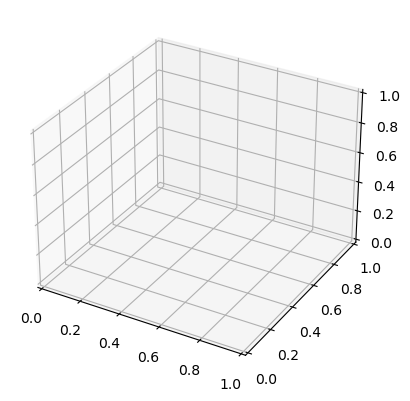

In [9]:
nbiter=400
step=3.e-6
cost=np.zeros((nbiter+1))
np.random.seed(42)
theta=np.random.randn(N.nb_params)
for k in range(nbiter) :
    cost[k]=N.eval(theta)
    theta-=step*N.grad(theta)
cost[nbiter]=N.eval(theta)
# On retrouve maintenant les prédictions du réseau de neurones, qui est la variable inp3 du state
(inp1,inp2,inp3,inp4)=N.forward(theta)

plt.clf
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, outp.reshape((nx,ny)),linewidth=0, antialiased=False)
plt.show()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, inp3.reshape((nx,ny)),linewidth=0, antialiased=False)
plt.show()


On peut jouer avec les paramètres pour essayer de faire avancer le réseau plus vite, on peut essayer de lancer une accélération de Wolfe, etc... Ce qui marche le mieux est encore un BFGS comme ci-dessous :

In [ ]:
from scipy.optimize import minimize
np.random.seed(42)
theta=np.random.randn(N.nb_params)

res = minimize(N.eval, theta, method='BFGS', jac=N.grad, options={'gtol': 1e-6, 'disp': True, 'maxiter': 400});
theta = res.x
# On retrouve maintenant les prédictions du réseau de neurones, qui est la variable inp3 du state
(inp1,inp2,inp3,inp4)=N.forward(theta)

plt.clf
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, outp.reshape((nx,ny)),linewidth=0, antialiased=False)
plt.show()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, inp3.reshape((nx,ny)),linewidth=0, antialiased=False)
plt.show()